In [1]:
#seaborn libs
%matplotlib notebook
%matplotlib inline
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn.categorical import _CategoricalPlotter, remove_na
from scipy import stats
# use Seaborn styles
sns.set()

In [2]:
clinical_data = "raw_data/clinicaltrial_data.csv"
mouse_data = "raw_data/mouse_drug_data.csv"

clinical_df = pd.read_csv(clinical_data)
mouse_df = pd.read_csv(mouse_data)

# Clean Data

In [3]:
#Find the duplicate mice 
drop_mouse_id_clinical = clinical_df.loc[clinical_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
clean_clinical = clinical_df[clinical_df['Mouse ID'].isin(drop_mouse_id_clinical)==False]
clean_mouse = mouse_df[mouse_df['Mouse ID'].isin(drop_mouse_id_clinical)==False]
drugdata_df = pd.merge(clean_clinical, clean_mouse, on = 'Mouse ID')
drugdata_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0           45.000000                 0  Capomulin
1     b128          5           45.651331                 0  Capomulin
2     b128         10           43.270852                 0  Capomulin
3     b128         15           43.784893                 0  Capomulin
4     b128         20           42.731552                 0  Capomulin

In [4]:
#Drop drugs not required for study
trunc1_df = drugdata_df[drugdata_df.Drug != "Zoniferol"]
trunc2_df = trunc1_df[drugdata_df.Drug != "Ceftamin" ]
trunc3_df = trunc2_df[drugdata_df.Drug != "Naftisol" ]
trunc4_df = trunc3_df[drugdata_df.Drug != "Propriva"]
trunc5_df = trunc4_df[drugdata_df.Drug != "Ramicane"]
trunc_df = trunc5_df[drugdata_df.Drug != "Stelasyn"]
trunc_df

C:\Users\dinot\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dinot\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\dinot\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\dinot\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\dinot\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFr

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0        b128          0           45.000000                 0  Capomulin
1        b128          5           45.651331                 0  Capomulin
2        b128         10           43.270852                 0  Capomulin
3        b128         15           43.784893                 0  Capomulin
4        b128         20           42.731552                 0  Capomulin
5        b128         25           43.262145                 1  Capomulin
6        b128         30           40.605335                 1  Capomulin
7        b128         35           37.967644                 1  Capomulin
8        b128         40           38.379726                 2  Capomulin
9        b128         45           38.982878                 2  Capomulin
10       f932          0           45.000000                 0   Ketapril
11       g107          0           45.000000                 0   Ketapril
12       g107          5           48.791665                 0   Ketapril
13       g107         10           53.435987                 0   Ketapril
14       g107         15           58.135545                 0   Ketapril
15       g107         20           62.706031                 0   Ketapril
16       g107         25           64.663626                 0   Ketapril
17       g107         30           69.160520                 0   Ketapril
18       g107         35           71.905117                 0   Ketapril
19       a457          0           45.000000                 0   Ketapril
20       a457          5           47.462891                 0   Ketapril
21       a457         10           49.783419                 0   Ketapril
22       c819          0           45.000000                 0   Ketapril
23       c819          5           45.769249                 1   Ketapril
24       c819         10           46.658395                 1   Ketapril
25       c819         15           48.370999                 1   Ketapril
26       c819         20           49.762415                 1   Ketapril
27       c819         25           51.828357                 1   Ketapril
28       c819         30           56.098998                 1   Ketapril
29       c819         35           57.729535                 1   Ketapril
...       ...        ...                 ...               ...        ...
1850     i557         25           44.596219                 0  Capomulin
1851     i557         30           45.261384                 0  Capomulin
1852     i557         35           45.941949                 0  Capomulin
1853     i557         40           46.821070                 1  Capomulin
1854     i557         45           47.685963                 1  Capomulin
1855     m957          0           45.000000                 0  Capomulin
1856     m957          5           45.622381                 1  Capomulin
1857     m957         10           46.414518                 1  Capomulin
1858     m957         15           39.804453                 1  Capomulin
1859     m957         20           38.909349                 1  Capomulin
1860     m957         25           37.695432                 1  Capomulin
1861     m957         30           38.212479                 1  Capomulin
1862     m957         35           32.562839                 1  Capomulin
1863     m957         40           32.947615                 1  Capomulin
1864     m957         45           33.329098                 1  Capomulin
1865     f966          0           45.000000                 0  Capomulin
1866     f966          5           38.796474                 0  Capomulin
1867     f966         10           35.624403                 0  Capomulin
1868     f966         15           32.623003                 0  Capomulin
1869     f966         20           30.485985                 0  Capomulin
1870     m601          0           45.000000                 0  Capomulin
1871     m601          5           41.408591                 1  Capomulin
1872     

In [5]:
#Drop the metastatic sites column
tumor_volume = drugdata_df.drop('Metastatic Sites', axis=1)
tumor_volume.head()

Mouse ID  Timepoint  Tumor Volume (mm3)       Drug
0     b128          0           45.000000  Capomulin
1     b128          5           45.651331  Capomulin
2     b128         10           43.270852  Capomulin
3     b128         15           43.784893  Capomulin
4     b128         20           42.731552  Capomulin

In [6]:
#Pivot the table to make 'Drug' the index
treatment_groups = tumor_volume.pivot_table(tumor_volume, index=['Drug','Timepoint'], aggfunc='mean')
treatment_groups.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [7]:
# Get the standard error of tumor volume
sem = tumor_volume.pivot_table(tumor_volume, index=['Drug','Timepoint'], aggfunc='sem')
sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [8]:
#Make a new df for tumor volume
tumor_volume = treatment_groups
tumor_volume['Tumor Volume Change (mm3)'] = tumor_volume.groupby('Drug')['Tumor Volume (mm3)'].diff()
#Drop the tumor volume column
tumor_volume_change = tumor_volume.drop('Tumor Volume (mm3)', axis=1)
tumor_volume_change.head()

Tumor Volume Change (mm3)
Drug      Timepoint                           
Capomulin 0                                NaN
          5                          -0.733914
          10                         -1.181796
          15                         -1.019973
          20                         -1.347992

In [9]:
#Fill in the NaN values with '0'.
tumor_volume_change.fillna(0, inplace=True)
tumor_volume_change.head()

Tumor Volume Change (mm3)
Drug      Timepoint                           
Capomulin 0                           0.000000
          5                          -0.733914
          10                         -1.181796
          15                         -1.019973
          20                         -1.347992

In [10]:
#Pivot the df so 'Timepoint' is the index 
tumor_vol_chart = treatment_groups.pivot_table('Tumor Volume (mm3)', ['Timepoint'],'Drug' )
tumor_vol_chart

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.168130  43.944859  47.470830  46.851818  
10         48.938560  42.531957  49.335368  48.689881  
15         50.891769  41.495061  51.448025  50.779059  
20         53.127384  40.238325  53.970080  53.170334  
25         55.462490  38.974300  56.172821  55.432935  
30         58.122548  38.703137  59.870528  57.713531  
35         60.103457  37.451996  62.432021  60.089372  
40         63.045537  36.574081  65.356386  62.916692  
45         66.258529  34.955595  68.438310  65.960888

In [11]:
#Pivot the sem df so 'Timepoint' is the index 
sem_chart = sem.pivot_table('Tumor Volume (mm3)', ['Timepoint'],'Drug' )
sem_chart

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.448593  0.164505   0.235102  0.264819  0.202385  0.218091   
10          0.702684  0.236144   0.282346  0.357421  0.319415  0.402064   
15          0.838617  0.332053   0.357705  0.580268  0.444378  0.614461   
20          0.909731  0.359482   0.476210  0.726484  0.595260  0.839609   
25          0.881642  0.439356   0.550315  0.755413  0.813706  1.034872   
30          0.934460  0.490620   0.631061  0.934121  0.975496  1.218231   
35          1.052241  0.692248   0.984155  1.127867  1.013769  1.287481   
40          1.223608  0.708505   1.055220  1.158449  1.118567  1.370634   
45          1.223977  0.902358   1.144427  1.453186  1.416363  1.351726   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.241842  0.482955  0.254830   0.188950  
10         0.388701  0.720225  0.461474   0.263949  
15         0.502024  0.770432  0.532904   0.370544  
20         0.607412  0.786199  0.684670   0.533182  
25         0.622040  0.746991  0.784320   0.602513  
30         0.807055  0.864906  0.952984   0.800043  
35         1.181202  0.967433  1.072411   0.881426  
40         1.564779  1.128445  1.410435   0.998515  
45         1.888586  1.226805  1.576556   1.003576

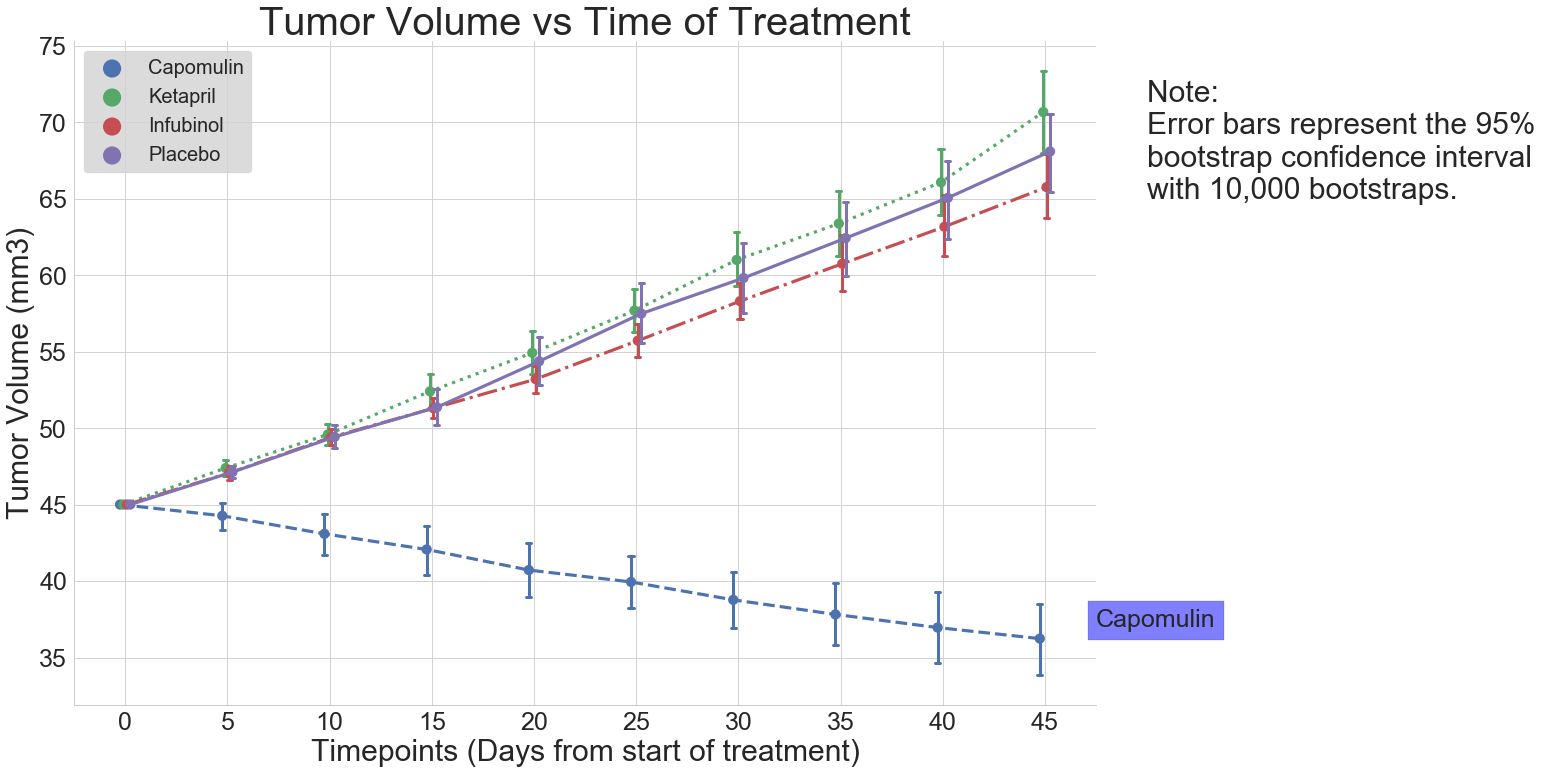

In [42]:
g1 = sns.factorplot(x='Timepoint', y='Tumor Volume (mm3)', hue='Drug', data=trunc_df, size=10, aspect=1.5, ci=95, n_boot=10000,
legend=False, errwidth=3, capsize=.05, dodge=True, linestyles=['--',':','-.','-','--','--',':','-.','-','--'])
ax = g1.ax
ax.text(10,65,'Note: \nError bars represent the 95% \nbootstrap confidence interval \nwith 10,000 bootstraps.').set_fontsize(30)
ax.text(9.5,37, 'Capomulin', bbox=dict(facecolor='blue', alpha=.5)).set_fontsize(25)
ax.legend(loc='upper left', fontsize=20, markerscale=2, frameon=True, facecolor='lightgrey')
ax.set_title('Tumor Volume vs Time of Treatment').set_fontsize(40)
ax.grid(color='lightgrey')
ax.set_xlabel('Timepoints (Days from start of treatment)').set_fontsize(30)
ax.set_ylabel('Tumor Volume (mm3)').set_fontsize(30)
ax.tick_params(which='major', labelsize=25)
ax.set_facecolor("white")
g1.savefig('tumor_vol_vs_treatment.png')

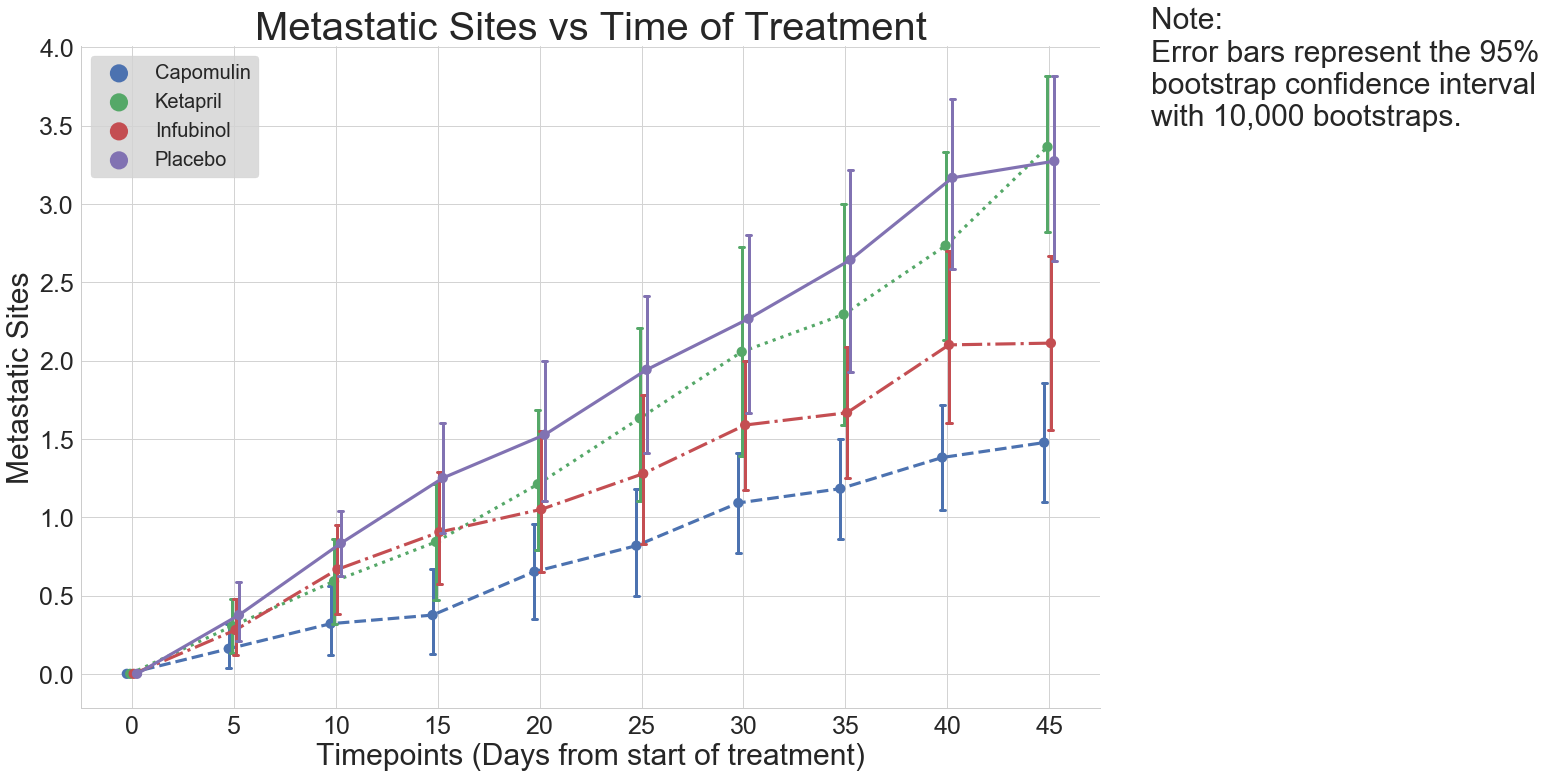

In [43]:
g2 = sns.factorplot(x='Timepoint', y='Metastatic Sites', hue='Drug', data=trunc_df, size=10, aspect=1.5, ci=95, n_boot=10000,
legend=False, errwidth=3, capsize=.05, dodge=True, linestyles=['--',':','-.','-','--','--',':','-.','-','--'])
ax = g2.ax
ax.text(10,3.5, 'Note: \nError bars represent the 95% \nbootstrap confidence interval \nwith 10,000 bootstraps.').set_fontsize(30)
ax.legend(loc='upper left', fontsize=20, markerscale=2, frameon=True, facecolor='lightgrey')
ax.set_title('Metastatic Sites vs Time of Treatment').set_fontsize(40)
ax.grid(color='lightgrey')
ax.set_xlabel('Timepoints (Days from start of treatment)').set_fontsize(30)
ax.set_ylabel('Metastatic Sites').set_fontsize(30)
ax.tick_params(which='major', labelsize=25)
ax.set_facecolor("white")
g2.savefig('metastatic_sites_vs_treatment.png')

In [14]:
# Store timepoint values in an array
timepoints = drugdata_df["Timepoint"].unique()
timepoints

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [56]:
drugpivot_df = pd.pivot_table(drugdata_df, values='Tumor Volume (mm3)', index='Timepoint', columns=['Drug'], aggfunc=np.mean)
drugpivot_df=drugpivot_df[["Capomulin","Infubinol", "Ketapril", "Placebo"]]
drugpivot_df

Drug       Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                            
0          45.000000  45.000000  45.000000  45.000000
5          44.266086  47.062001  47.389175  47.125589
10         43.084291  49.403909  49.582269  49.423329
15         42.064317  51.296397  52.399974  51.359742
20         40.716325  53.197691  54.920935  54.364417
25         39.939528  55.715252  57.678982  57.482574
30         38.769339  58.299397  60.994507  59.809063
35         37.816839  60.742461  63.371686  62.420615
40         36.958001  63.162824  66.068580  65.052675
45         36.236114  65.755562  70.662958  68.084082

In [16]:
#Drop the tumor volume
metastatic_df = trunc_df.drop('Tumor Volume (mm3)', axis=1)
metastatic_df
#Drop the metastatic sites and tumor volume
mouse_survival = metastatic_df.drop('Metastatic Sites', axis=1)

In [17]:
drugpivot_micecount = pd.pivot_table(drugdata_df, values='Mouse ID', index=['Drug', 'Timepoint'], aggfunc='count')
drugpivot_micecount

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Ceftamin  0                25
          5                21
          10               20
          15               19
          20               18
          25               18
          30               16
          35               14
          40               14
          45               13
Infubinol 0                25
          5                25
          10               21
          15               21
          20               20
          25               18
          30               17
          35               12
          40               10
          45                9
...                       ...
Ramicane  0                25
          5                25
          10               24
          15               24
          20               23
          25               23
          30               23
          35               21
          40               20
          45               20
Stelasyn  0                24
          5                23
          10               21
          15               21
          20               19
          25               18
          30               17
          35               15
          40               12
          45               11
Zoniferol 0                25
          5                24
          10               22
          15               21
          20               17
          25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [18]:
#Change the name of "Mouse ID" to "Mouse Count"
mice_survival_df = drugpivot_micecount.rename(columns={"Mouse ID": "Mouse Count"})
mice_survival_df

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Ceftamin  0                   25
          5                   21
          10                  20
          15                  19
          20                  18
          25                  18
          30                  16
          35                  14
          40                  14
          45                  13
Infubinol 0                   25
          5                   25
          10                  21
          15                  21
          20                  20
          25                  18
          30                  17
          35                  12
          40                  10
          45                   9
...                          ...
Ramicane  0                   25
          5                   25
          10                  24
          15                  24
          20                  23
          25                  23
          30                  23
          35                  21
          40                  20
          45                  20
Stelasyn  0                   24
          5                   23
          10                  21
          15                  21
          20                  19
          25                  18
          30                  17
          35                  15
          40                  12
          45                  11
Zoniferol 0                   25
          5                   24
          10                  22
          15                  21
          20                  17
          25                  16
          30                  15
          35                  14
          40                  14
          45                  14

[100 rows x 1 columns]

In [19]:
#Pivot the df so 'Timepoint' is the index 
mice_survival_chart = mice_survival_df.pivot_table('Mouse Count', ['Timepoint'],'Drug' )
mice_survival_chart

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   
25                22        18         18        19        18       17   
30                22        16         17        18        15       15   
35                22        14         12        17        15       14   
40                21        14         10        15        15       12   
45                21        13          9        11        13       11   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                24        25        24         25  
5                23        25        23         24  
10               21        24        21         22  
15               15        24        21         21  
20               15        23        19         17  
25               13        23        18         16  
30               12        23        17         15  
35                9        21        15         14  
40                9        20        12         14  
45                7        20        11         14

In [20]:
# mice_survival_chart.index
# mice_survival_chart.reset_index(inplace=True)
df_count = drugdata_df.groupby(['Drug', 'Timepoint']).count()
df_count.reset_index(inplace=True)
# df_count.rename(index={"Mouse ID": "Mouse Count"})
df_count = df_count.drop('Tumor Volume (mm3)', axis=1)
df_count = df_count.drop('Metastatic Sites', axis=1)

In [21]:
df_count.rename(columns={"Mouse ID": "Mouse Count"})
df_count.head()

Drug  Timepoint  Mouse ID
0  Capomulin          0        25
1  Capomulin          5        25
2  Capomulin         10        25
3  Capomulin         15        24
4  Capomulin         20        23

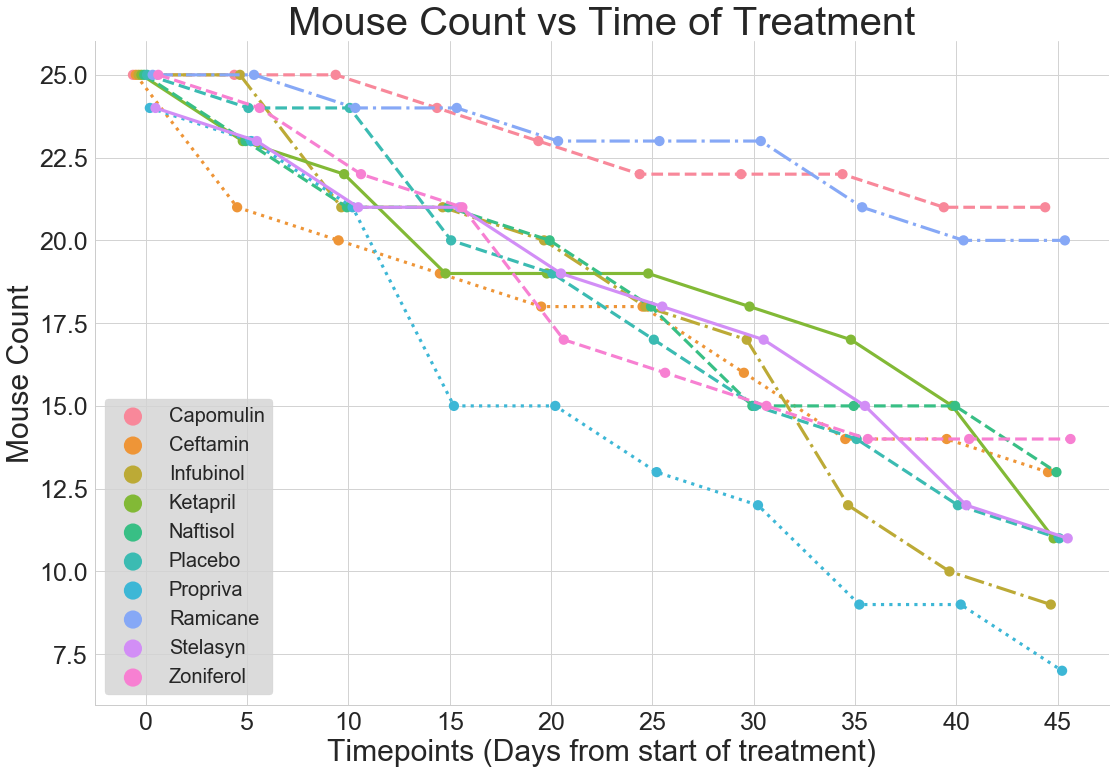

In [44]:
g3 = sns.factorplot(x='Timepoint', y='Mouse ID', hue='Drug', data=df_count, size=10, aspect=1.5, ci=95, n_boot=10000,
legend=False, errwidth=3, capsize=.05, dodge=True, linestyles=['--',':','-.','-','--','--',':','-.','-','--'])
ax = g3.ax
ax.legend(loc='lower left', fontsize=20, markerscale=2, frameon=True, facecolor='lightgrey')
ax.set_title('Mouse Count vs Time of Treatment').set_fontsize(40)
ax.grid(color='lightgrey')
ax.set_xlabel('Timepoints (Days from start of treatment)').set_fontsize(30)
ax.set_ylabel('Mouse Count').set_fontsize(30)
ax.tick_params(which='major', labelsize=25)
ax.set_facecolor("white")
g3.savefig('mouse_count_vs_treatment.png')

# Calculating Percent Survival Rate

In [ ]:
# Survival Rate (%).
mice_percent = (1-(mice_survival_chart.iloc[0]- mice_survival_chart)/mice_survival_chart.iloc[0])*100
mice_percent

In [24]:
mice_percent.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [30]:
mice_percent.reset_index(inplace=True)
# # df_count.rename(index={"Mouse ID": "Mouse Count"})
# df_count = df_count.drop('Tumor Volume (mm3)', axis=1)
# df_count = df_count.drop('Metastatic Sites', axis=1)
mice_percent

Drug  Timepoint  Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
0             0      100.0     100.0      100.0     100.0     100.0    100.0   
1             5      100.0      84.0      100.0      92.0      92.0     96.0   
2            10      100.0      80.0       84.0      88.0      84.0     96.0   
3            15       96.0      76.0       84.0      76.0      84.0     80.0   
4            20       92.0      72.0       80.0      76.0      80.0     76.0   
5            25       88.0      72.0       72.0      76.0      72.0     68.0   
6            30       88.0      64.0       68.0      72.0      60.0     60.0   
7            35       88.0      56.0       48.0      68.0      60.0     56.0   
8            40       84.0      56.0       40.0      60.0      60.0     48.0   
9            45       84.0      52.0       36.0      44.0      52.0     44.0   

Drug    Propriva  Ramicane    Stelasyn  Zoniferol  
0     100.000000     100.0  100.000000      100.0  
1      95.833333     100.0   95.833333       96.0  
2      87.500000      96.0   87.500000       88.0  
3      62.500000      96.0   87.500000       84.0  
4      62.500000      92.0   79.166667       68.0  
5      54.166667      92.0   75.000000       64.0  
6      50.000000      92.0   70.833333       60.0  
7      37.500000      84.0   62.500000       56.0  
8      37.500000      80.0   50.000000       56.0  
9      29.166667      80.0   45.833333       56.0

In [26]:
x = df_count.index
y = df_count.columns
drugdata_df.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')

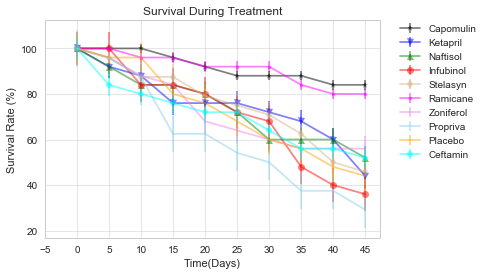

In [34]:
# Set the x_axis, colors, makers, and xlim for the line graphs with drugs in the legend.
x_axis = np.arange(0, 50, 5)
colors = ['black','blue','green','red','tan','magenta','violet','skyblue','orange','aqua']
markers = ['*','v','^','o','d','.','2','3','4','8']    
#plt.xlim(0,50)
drugs = drugdata_df["Drug"].unique()
count = np.arange(0,len(drugs))

plt.style.use('seaborn-whitegrid')
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(alpha = 0.5)
for i in count:
    chart_data = stats.sem(mice_percent[drugs[i]])
    plt.errorbar(x_axis, mice_percent[drugs[i]], yerr = chart_data, marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])

plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.xticks(np.arange(min(x_axis)-5, max(x_axis)+5, 5.0))
plt.show()


In [63]:
# Get the first and last rows of the tumor volume chart
first_last_vol_values = tumor_vol_chart.iloc[[0,-1]]
first_last_vol_values

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane  Stelasyn  Zoniferol  
Timepoint                                             
0          45.000000  45.000000  45.00000  45.000000  
45         66.258529  34.955595  68.43831  65.960888

In [64]:
# Get % tumor volume change
percent_tumor_vol_change = ((first_last_vol_values -first_last_vol_values.iloc[0])/first_last_vol_values.iloc[0])*100
percent_tumor_vol_change

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   Placebo  \
Timepoint                                                                    
0           0.000000   0.000000   0.000000   0.000000   0.000000   0.00000   
45        -19.475303  42.516492  46.123472  57.028795  53.923347  51.29796   

Drug        Propriva  Ramicane   Stelasyn  Zoniferol  
Timepoint                                             
0           0.000000    0.0000   0.000000   0.000000  
45         47.241175  -22.3209  52.085134  46.579751

In [65]:
# Get the last row.
percent_change = percent_tumor_vol_change.loc[1:]
y = percent_change.sum()
print(y)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


# Summary Bar Graph

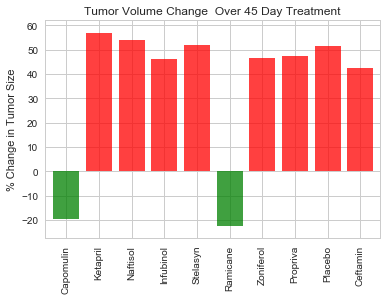

In [66]:
# create the bar chart of tumor shrinkage
plt.style.use('seaborn-whitegrid')
performance = {}
for x in count:
    performance[drugs[x]] = float(percent_change[drugs[x]])
x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)
plt.xlim(-0.25, len(drugs))
plt.ylim(min(performance.values()) - 5, max(performance.values()) + 5)
plt.title("Tumor Volume Change  Over 45 Day Treatment")
plt.ylabel("% Change in Tumor Size")
bar_colors = pd.Series(list(performance.values()))
bar_colors = bar_colors > 0
bar_colors = bar_colors.map({True: "Red", False: "Green"})
plt.xticks(tick_locations, performance, rotation="vertical" )
plt.bar(x_axis, performance.values(), color =bar_colors, alpha=0.75, align="edge")
plt.show()